### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import keras

tf.reset_default_graph()
tf.set_random_seed(42)

Using TensorFlow backend.


#### Collect Fashion mnist data from tf.keras.datasets 

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print ("x_train length: ", len(x_train))
print ("y_train length: ", len(y_train))
print ("x_train shape: ", x_train.shape)
print ("y_train shape: ", y_train.shape)

x_train length:  60000
y_train length:  60000
x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)


In [4]:
print ("x_test length: ", len(x_test))
print ("y_test length: ", len(y_test))
print ("x_test shape: ", x_test.shape)
print ("y_test shape: ", y_test.shape)

x_test length:  10000
y_test length:  10000
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


#### Change train and test labels into one-hot vectors

In [5]:
print ("y_train, before one hot vectors conversion")
y_train[0:5]

y_train, before one hot vectors conversion


array([9, 0, 0, 3, 0], dtype=uint8)

In [0]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [7]:
print ("y_train, after one hot vectors conversion")
y_train[0:5,:]

y_train, after one hot vectors conversion


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#dropout layer
model.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Store Training Results
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=30,
          batch_size=20, callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 19s 320us/sample - loss: 0.5356 - acc: 0.8086 - val_loss: 0.4102 - val_acc: 0.8533
Epoch 2/30
60000/60000 [==============================] - 19s 312us/sample - loss: 0.4222 - acc: 0.8464 - val_loss: 0.3988 - val_acc: 0.8569
Epoch 3/30
60000/60000 [==============================] - 19s 309us/sample - loss: 0.3827 - acc: 0.8602 - val_loss: 0.3661 - val_acc: 0.8659
Epoch 4/30
60000/60000 [==============================] - 19s 310us/sample - loss: 0.3585 - acc: 0.8702 - val_loss: 0.3757 - val_acc: 0.8688
Epoch 5/30
60000/60000 [==============================] - 19s 318us/sample - loss: 0.3381 - acc: 0.8781 - val_loss: 0.3587 - val_acc: 0.8719
Epoch 6/30
60000/60000 [==============================] - 19s 309us/sample - loss: 0.3214 - acc: 0.8810 - val_loss: 0.3549 - val_acc: 0.8772
Epoch 7/30
60000/60000 [==============================] - 19s 310us/sample - loss: 0.3108 - acc: 0.8843 

In [16]:
loss_and_metrics = model.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.3842 - acc: 0.8856
[0.38417180033922194, 0.8856]


In [18]:

print ("Final Train Accuracy from model history: ", model.history.history['acc'][-1])
print ("Final Test Accuracy from model history: ", model.history.history['val_acc'][-1])

Final Train Accuracy from model history:  0.9182
Final Test Accuracy from model history:  0.8856


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


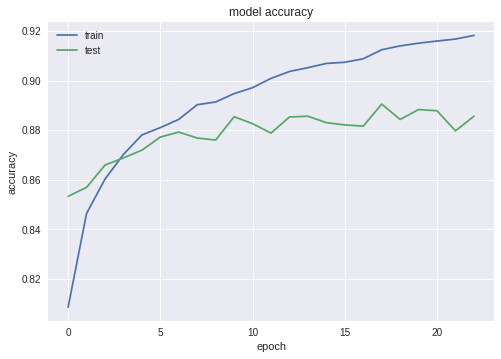

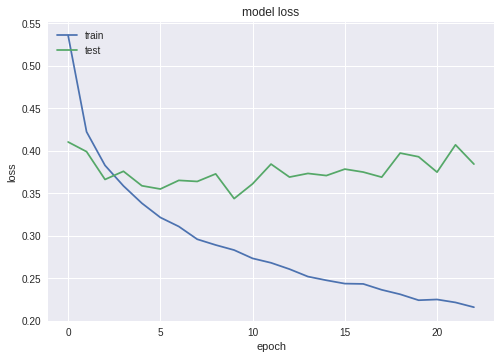

In [20]:
import matplotlib.pyplot as plt

# list all data in history
print(model.history.history.keys())
# summarize history for accuracy
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Word Embeddings in Python with Gensim

In this, you will practice how to train and load word embedding models for natural language processing applications in Python using Gensim.


1. How to train your own word2vec word embedding model on text data.
2. How to visualize a trained word embedding model using Principal Component Analysis.
3. How to load pre-trained word2vec word embedding models.

### Run the below two commands to install gensim and the wiki dataset

In [1]:
!pip3 install --upgrade gensim --user

Requirement already up-to-date: gensim in /root/.local/lib/python3.6/site-packages (3.7.1)


In [2]:
!pip3 install wikipedia --user

### Import gensim

In [0]:
import gensim

### Obtain Text

Import search and page functions from wikipedia module
search(/key word/): search function takes keyword as argument and gives top 10 article titles matching the given keyword.

page(/title of article/): page function takes page title as argument and gives content in the output.

In [0]:
## Usage: 
from wikipedia import search, page
titles = search("Artificial Intelligence")

### Print the top 10 titles for the keyword `Machine Learning`

In [50]:
print ("Top 10 titles for the keyword: Deep Learning")
titles[:10]

Top 10 titles for the keyword: Deep Learning


['Artificial intelligence',
 'A.I. Artificial Intelligence',
 'History of artificial intelligence',
 'Applications of artificial intelligence',
 'Artificial general intelligence',
 'List of artificial intelligence films',
 'Timeline of artificial intelligence',
 'Philosophy of artificial intelligence',
 'Technological singularity',
 'Ethics of artificial intelligence']

### Get the content from the first title from the above obtained 10 titles.

In [0]:
wikipage = page(titles[0])
content = wikipage.content

### Create a list with name `documents` and append all the words in the 10 pages' content using the above 10 titles.

In [0]:
import re, string

def clean_str(string):
  """
  String cleaning before vectorization
  """
  try:    
    string = re.sub(r'^https?:\/\/<>.*[\r\n]*', '', string, flags=re.MULTILINE)
    string = re.sub(r"[^A-Za-z]", " ", string)         
    words = string.strip().lower().split()    
    words = [w for w in words if len(w)>=1]
    return " ".join(words)	
  except:
    return ""

In [0]:
Top10Contents = []
for i in range(10):
  Top10Contents.append(clean_str(page(titles[i]).content))

In [0]:
documents = []
for content in Top10Contents:
  documents.append(content.split(' '))

In [55]:
print ('Document size: ', len(documents))
print ('Document list 1:')
print (documents[0])

Document size:  10
Document list 1:
['in', 'the', 'field', 'of', 'computer', 'science', 'artificial', 'intelligence', 'ai', 'sometimes', 'called', 'machine', 'intelligence', 'is', 'intelligence', 'demonstrated', 'by', 'machines', 'in', 'contrast', 'to', 'the', 'natural', 'intelligence', 'displayed', 'by', 'humans', 'and', 'other', 'animals', 'computer', 'science', 'defines', 'ai', 'research', 'as', 'the', 'study', 'of', 'intelligent', 'agents', 'any', 'device', 'that', 'perceives', 'its', 'environment', 'and', 'takes', 'actions', 'that', 'maximize', 'its', 'chance', 'of', 'successfully', 'achieving', 'its', 'goals', 'more', 'specifically', 'kaplan', 'and', 'haenlein', 'define', 'ai', 'as', 'a', 'system', 's', 'ability', 'to', 'correctly', 'interpret', 'external', 'data', 'to', 'learn', 'from', 'such', 'data', 'and', 'to', 'use', 'those', 'learnings', 'to', 'achieve', 'specific', 'goals', 'and', 'tasks', 'through', 'flexible', 'adaptation', 'colloquially', 'the', 'term', 'artificial', '

### Build the gensim model for word2vec with by considering all the words with frequency >=1 with embedding size=50

In [0]:
#Build the model
model = gensim.models.Word2Vec(documents, #Word list
                               min_count=1, #Ignore all words with total frequency lower than this                           
                               workers=4, #Number of CPUs
                               size=50,  #Embedding size
                               window=5, #Maximum Distance between current and predicted word
                               iter=10   #Number of iterations over the text corpus
                              )  

### Exploring the model

In [57]:
# Vocablury of the model
model.wv.vocab

{'in': <gensim.models.keyedvectors.Vocab at 0x7efe88662f28>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7efe88662cf8>,
 'field': <gensim.models.keyedvectors.Vocab at 0x7efe88662828>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7efe88662f98>,
 'computer': <gensim.models.keyedvectors.Vocab at 0x7efe886627f0>,
 'science': <gensim.models.keyedvectors.Vocab at 0x7efe88662da0>,
 'artificial': <gensim.models.keyedvectors.Vocab at 0x7efe886626a0>,
 'intelligence': <gensim.models.keyedvectors.Vocab at 0x7efe88662780>,
 'ai': <gensim.models.keyedvectors.Vocab at 0x7efe88662748>,
 'sometimes': <gensim.models.keyedvectors.Vocab at 0x7efe88662ef0>,
 'called': <gensim.models.keyedvectors.Vocab at 0x7efe88662b70>,
 'machine': <gensim.models.keyedvectors.Vocab at 0x7efe88662550>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7efe88662ac8>,
 'demonstrated': <gensim.models.keyedvectors.Vocab at 0x7efe88662e10>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7efe886629b0>,
 'machines': <gensim.model

#### Check how many words in the model

In [58]:
#Model size
model.wv.syn0.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


(6734, 50)

### Get an embedding for word `SVM`

In [59]:
model.wv['svm']

array([ 0.08031141, -0.01765494,  0.04466975, -0.05737767,  0.00274333,
        0.09735881, -0.04250888,  0.04572222,  0.09117236, -0.02440441,
       -0.10954895, -0.1430697 , -0.0998986 , -0.07948656,  0.10606617,
        0.09096397,  0.04447713, -0.01989489, -0.04192123,  0.02064684,
       -0.05061979,  0.05583786,  0.20764396, -0.01825525,  0.11460563,
       -0.12445873, -0.10822814,  0.12600978, -0.08088572, -0.01167791,
       -0.04336742,  0.0730285 , -0.15615544,  0.09369434, -0.03241618,
       -0.02645035,  0.01411771, -0.05056387, -0.00968395,  0.09444426,
       -0.04075095,  0.16136806, -0.04985407, -0.2038015 ,  0.08855092,
        0.00958085, -0.0914079 , -0.09509609, -0.20538376,  0.03023317],
      dtype=float32)

### Finding most similar words for word `learning`

In [60]:
model.wv.most_similar('learning')

[('systems', 0.9997279644012451),
 ('using', 0.9997193813323975),
 ('algorithms', 0.9997156262397766),
 ('deep', 0.999713659286499),
 ('applications', 0.9997128248214722),
 ('data', 0.9996964931488037),
 ('through', 0.9996964335441589),
 ('including', 0.9996936321258545),
 ('algorithm', 0.9996777772903442),
 ('or', 0.9996771216392517)]

### Find the word which is not like others from `machine, svm, ball, learning`

In [61]:
model.doesnt_match("machine, svm, ball, learning".split())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'learning'

### Save the model with name `word2vec-wiki-10`

In [0]:
model.save('word2vec-wiki-10')

### Load the model `word2vec-wiki-10`

In [0]:
#Load model from memory
model = gensim.models.Word2Vec.load('word2vec-wiki-10')